## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
new_df = [mouse_metadata, study_results]
merged_df = pd.concat(new_df)

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,NaN,NaN,NaN
1,s185,Capomulin,Female,3.0,17.0,NaN,NaN,NaN
2,x401,Capomulin,Female,16.0,15.0,NaN,NaN,NaN
3,m601,Capomulin,Male,22.0,17.0,NaN,NaN,NaN
4,g791,Ramicane,Male,11.0,16.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1888,r944,NaN,NaN,NaN,NaN,45.0,41.581521,2.0
1889,u364,NaN,NaN,NaN,NaN,45.0,31.023923,3.0
1890,p438,NaN,NaN,NaN,NaN,45.0,61.433892,1.0
1891,x773,NaN,NaN,NaN,NaN,45.0,58.634971,4.0


In [2]:
# Checking the number of mice.
mice_gb = merged_df.groupby(merged_df["Mouse ID"])
mice_unique = mice_gb["Mouse ID"].unique()
mice_count = mice_unique.count()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mice_count_tp = mice_gb[mice_gb[]
mice_count_tp = merged_df[merged_df["Timepoint"]>0]
mice_count_tp = mice_count_tp["Mouse ID"].unique()
mice_count_tp

array(['a275', 'w575', 'x822', 'l509', 'n304', 'd164', 'l897', 'l558',
       'g296', 'c458', 'a401', 'l700', 'f234', 'x613', 'u149', 'k210',
       'x402', 'q610', 'x581', 'a492', 'm133', 'l725', 'q633', 'f129',
       'q483', 'a444', 'v835', 'r604', 'f394', 'y865', 'd251', 'b313',
       'y769', 'z234', 'b559', 'f993', 'q119', 'j989', 'w150', 'n923',
       'y449', 'l661', 'c302', 'c264', 'l471', 'x930', 'k754', 'f436',
       'v295', 'j913', 's710', 'z969', 'k894', 'l490', 'b759', 'a411',
       'f545', 'o725', 'y601', 'w914', 'n967', 'l733', 'm601', 'b487',
       'o287', 'p310', 'r107', 's565', 'w350', 's187', 'j984', 'w697',
       'j755', 'g570', 'u364', 'x209', 'c402', 'b742', 'n630', 'g989',
       'e213', 'a366', 'w746', 's141', 'i901', 't198', 'b879', 'k603',
       'o523', 'v923', 'f966', 'p387', 'g867', 'i635', 's619', 'a699',
       'q132', 'k862', 'h333', 'x401', 'o926', 'c927', 'c559', 'r701',
       'j119', 'p438', 'm269', 'a963', 'p136', 't724', 'z314', 'a818',
      

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = pd.merge(mouse_metadata, study_results,on="Mouse ID")
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_unique2 = df2["Mouse ID"].unique()
mice_count2 = len(mice_unique2)
mice_count2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_regimen_mean = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].mean()
df_regimen_median = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].median()
df_regimen_var = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].var()
df_regimen_std = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].std()
df_regimen_sem = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean": df_regimen_mean,
                           "Median":df_regimen_median,
                           "Variance":df_regimen_var,
                           "Standard Deviation":df_regimen_std,
                           "SEM":df_regimen_sem
                          })
summary_df.reset_index()
# This method is the most straighforward, creating multiple series and putting them all together at the end.


# Below is summary on entire data set(the regimen portion was cutoff on first try)
# df2_mean=df2["Tumor Volume (mm3)"].mean()
# df2_median=df2["Tumor Volume (mm3)"].median()
# df2_variance=df2["Tumor Volume (mm3)"].var()
# df2_std=df2["Tumor Volume (mm3)"].std()
# df2_sem=df2["Tumor Volume (mm3)"].sem()
# print("The mean is " + df2_mean)
# print("The median is " + df2_median)
# print("The variance is " + df2_variance)
# print("The standard deviation is " + df2_std)
# print("The SEM is " + df2_sem)

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

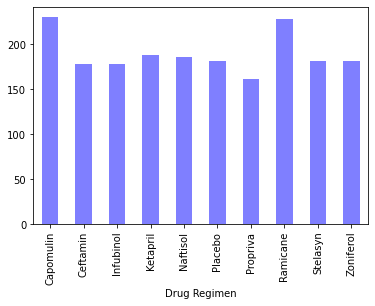

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_df = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].count()

x = len(regimen_df)
y = regimen_df
regimen_df.plot.bar(color='b', alpha=0.5, align="center")



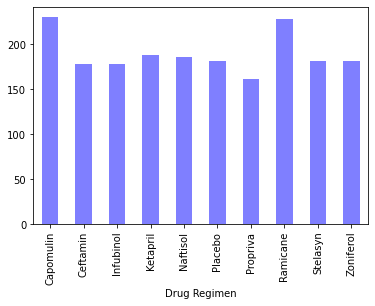

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_df = merged_df.groupby(df2["Drug Regimen"])["Tumor Volume (mm3)"].count()
# regimen_df
regimen_df.plot(kind="bar",color='b', alpha=0.5, align="center")

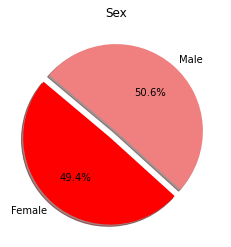

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = merged_df.groupby(df2["Sex"])["Mouse ID"].count()
gender_df
labels = ["Female", "Male"]
colors = ["red", "lightcoral"]
explode = (0.1, 0)
plt.title("Sex")
plt.pie(gender_df, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

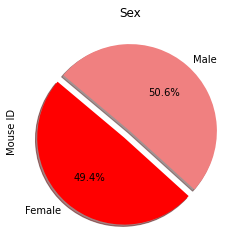

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = merged_df.groupby(df2["Sex"])["Mouse ID"].count()
labels = ["Female", "Male"]
colors = ["red", "lightcoral"]
explode = (0.1, 0)
plt.title("Sex")
gender_df.plot(kind='pie', x=gender_df, explode=explode, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
